## Prompt

**Assessing Data for this Project**  
<br /> After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

**Cleaning Data for this Project**  
<br /> Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

**Storing, Analyzing, and Visualizing Data for this Project**  
<br /> Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

**Analyze and visualize the wrangled data** with at least three (3) insights and one (1) visualization.

## Introduction

I will explore four different questions: 
- Which dog stages receive the highest rating
- Breed and rating relationship
- What are the most popular dog names
- What dog stages have the highest favorite count

To answer these questions, the data cleaning and data restructure will aim to clean the best of relevant columns. The rest of the dataset will be omiited/ ignored as they do not contribute to give insights for the questions above (e.g: timestamp of the tweets)

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [ ]:
#Read archived dataset
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Read prediction dataset
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    
img_df = pd.read_csv('image-predictions.tsv', sep='\t')

## Twitter data collection process

Data collected from Udacity online platform

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#Read json dataset
df_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_json = df_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_json = df_json.reset_index(drop=True)

## Access data

Access dataframe

In [5]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#The "expanded_url" column provides every link that the website can find with that url
df.expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [7]:
#The doggo, floofer, pupper and poppo columns seem weird, I will randomly check these columns
df.sample(20)[['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
864,None,None,None,None
11,None,None,None,None
1175,None,None,None,None
687,None,None,None,None
1268,None,None,None,None
825,None,None,None,None
2166,None,None,None,None
343,None,None,None,None
62,None,None,None,None
642,None,None,None,None


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# No duplicated rows
df[df.duplicated()].shape

(0, 17)

In [10]:
#Check bad name
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
actually         2
not              2
mad              2
officially       1
life             1
infuriating      1
unacceptable     1
space            1
old              1
his              1
incredibly       1
such             1
by               1
light            1
all              1
my               1
this             1
Name: name, dtype: int64

**Comment**: 
- There are a total of 2356 rows 
- Retweeted and in_reply columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id,) have a high number of null values (but we will not be using that). The "expanded_urls" column has a few missing data. 
- Timestamp and retweeted_status_timestamp is an object, which will be converted into a timestamp.
- We will not be using retweets data, and this dataset includes the retweets category. Thus, we have to filter out the retweet rows. 
- Dog stages columns have very bad structure (which implies that it has gone through one-hot encoding, but instead of Nan values, they are 'None' values). I will have to reorganize them. 
- Dog names column is not clean. Some observations are not even names

## Access image prediction

In [11]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
img_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1838,837471256429613056,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1,Norwegian_elkhound,0.976255,True,keeshond,0.013990,True,seat_belt,0.002111,False
1021,710269109699739648,https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg,1,pug,0.415495,True,German_shepherd,0.178157,True,Labrador_retriever,0.100202,True
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False
1763,826240494070030336,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French_bulldog,0.903048,True,pug,0.096242,True,Boston_bull,0.000234,True
808,692142790915014657,https://pbs.twimg.com/media/CZr8LvyXEAABJ9k.jpg,3,toy_poodle,0.670068,True,teddy,0.190898,False,miniature_poodle,0.032178,True
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,Chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True


In [13]:
img_df.shape

(2075, 12)

In [14]:
#Describe the dataset
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
print ('Number of duplicated links:', img_df[img_df.jpg_url.duplicated()].shape[0])

Number of duplicated links: 66


In [17]:
img_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

**Comment**: 
- No null values, but there are some duplicated rows. 

## Access df_json

In [18]:
df_json.sample(20)

,tweet_id,retweet_count,favorite_count
1440,696754882863349760,396,1615
658,791406955684368384,4797,14670
707,785264754247995392,1911,8128
1729,679844490799091713,887,2593
634,793601777308463104,1908,8926
1482,693231807727280129,841,3133
401,824325613288833024,11848,12999
2067,671134062904504320,212,796
2305,666826780179869698,105,266
1289,708119489313951744,1102,2937


In [19]:
df_json.shape

(2354, 3)

In [20]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,669324657376567296,3652,0
freq,1,5,179


In [21]:
#No null values
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


In [22]:
#No duplicated values
df_json[df_json.duplicated()].shape[0]

0

> **Messiness Issues** 
<br /> **df:**
<br /> (1) Missing data in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls 
<br /> (2) This dataset includes retweets, but I will not use retweet dataset. Thus, I have to filter out those rows that are retweets
<br /> (3) Timestamp and retweeted_status_timestamp is an object. Need to be fixed into timestamp format
<br /> (4) The expanded_url includes all possible links within that url. If one wants to use this link, they will have to filter out one link only
<br /> (5) Some dog names are suspiciously not names. I will have to delete them out of the dataset.
<br /> (6) The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs. I will process this to calculate the true rating
<br /> **img_df:** 
<br /> (1) dog breeds are funnily not consistent in all p1,p2,p3 in at least 20 first data. I created a subset of random 20 rows, same thing happen. Thus, dog breeds column is unreliable data.  
<br /> **df_tweet_json:** tweet_id format (currently object)

> **Tidiness Issues**
<br /> **df**: 'doggo','floofer','pupper','puppo' columns should be binary (Yes, No/ 0,1) rather than repeating the whole column name/ Nan 
<br /> **img_df and df_json**: Need to merge with the df dataset
<br /> **img_df**: There are three prediction algorithm. I will have to create a new algorithm to choose the best prediction out of all possible values.


## DATA CLEANING

**THINGS TO DO** 

    1)All timestamps to be changed into datetime format.
    
    2)One column for dog stages: doggo, floofer, pupper, puppo
    
    3)Dog breed: Depending on the algorithm function. If 1st algorithm performs too bad, move to the next one. Threshold: 30% for each. If none reaches 30%, it's empty 
    
    4)Change the prediction dog breed to all lower case
    
    5)Delete retweets
    
    6)Dog ratings get standardized.        

    7)Merge the copied df_clean, img_df_clean, and _json_clean dataframes
    
    8)Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
    
    9)Tweet_id format for merging
    
    10)Remove rows with non-dog names

In [40]:
df_clean = df.copy()
img_df_clean = img_df.copy()
df_json_clean = df_json.copy()

In [41]:
# (1) Timestamp to datetime format
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [42]:
# (2) Dog stages to one column

#Change the name before merging into one column
df_clean.doggo.replace([np.NaN, 'None'], '', inplace=True)
df_clean.floofer.replace([np.NaN, 'None'], '', inplace=True)
df_clean.pupper.replace([np.NaN, 'None'], '', inplace=True)
df_clean.puppo.replace([np.NaN, 'None'], '', inplace=True)

#Some dogs have 2 stages, we need to merge them together
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# Drop unnecessary columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage.replace('', np.nan, inplace=True)

#Test
df_clean.stage[0:10]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: stage, dtype: object

In [43]:
#(3) Dog breed: Choose among three image prediction algorithm
breed = []
for i in range (len(img_df_clean)):
    if (img_df_clean.p1_dog[i] == True) & (img_df_clean.p1_conf[i] > 0.3) :
        breed.append(img_df_clean.p1[i])
    elif (img_df_clean.p2_conf[i] > 0.3) & img_df_clean.p2_dog[i] == True:
        breed.append(img_df_clean.p2[i])
    elif (img_df_clean.p3_conf[i] > 0.3) & img_df_clean.p3_dog[i] == True:
        breed.append(img_df_clean.p3[i])
    else: 
        breed.append('Unidentified')

# (4)Change the prediction dog breed to all lower case
breed = [element.lower() for element in breed]
img_df_clean['breed'] = breed

img_df_clean['breed'][0:10]

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
5      bernese_mountain_dog
6              unidentified
7                      chow
8              unidentified
9              unidentified
Name: breed, dtype: object

In [44]:
# (5) Delete retweets
df_clean = df_clean.drop(df_clean[(df_clean['in_reply_to_status_id'].isnull() == False) | (df_clean['retweeted_status_id'].isnull() == False)].index)

#Test => ZERO values 
sum ((df_clean['in_reply_to_status_id'].isnull() == False) | (df_clean['retweeted_status_id'].isnull() == False))

0

In [45]:
# (6) Calculate dog rating
df_clean['rate'] = df_clean.rating_numerator/ df_clean.rating_denominator

#Test
df_clean['rate'][0:5]

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rate, dtype: float64

In [46]:
# (7) Merge (8) Change tweet_id format for merging function
df_clean.tweet_id = df_clean.tweet_id.astype(np.int64)
img_df_clean.tweet_id = img_df_clean.tweet_id.astype(np.int64)
df_json_clean.tweet_id = df_json_clean.tweet_id.astype(np.int64)
data = pd.merge (df_clean, img_df_clean, on = ['tweet_id'], how = 'inner')
data = pd.merge (data, df_json_clean, on = ['tweet_id'], how = 'left')

#Test
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,unidentified,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,chihuahua,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,unidentified,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,9774,41048


In [47]:
## (9) Remove unnecessary columns
data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'rate', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'breed', 'retweet_count', 'favorite_count'],
      dtype='object')

In [48]:
data.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'p1', 'p1_conf', 'p1_dog', 'p2', 
        'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], axis=1, inplace=True)

#Test
data.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'stage', 'rate', 'jpg_url', 'img_num', 'breed', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [49]:
# (10) Clean dog names
failed_name = data[data.name.str.islower()].name.unique()
data['name'] = data['name'].replace(failed_name, np.nan)
data['name'] = data['name'].replace('None', np.nan)
data.name.dropna(inplace = True)

In [52]:
#Test => ZERO values of nonsense names
sum(data.name.str.islower())

0

In [50]:
#There are still missing data, but I will accept these missing data. This dataset is available for further analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns, UTC]
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
rate                  1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null int64
breed                 1971 non-null object
retweet_count         1971 non-null object
favorite_count        1971 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(6)
memory usage: 195.3+ KB


## STORE DATA VALUES

In [53]:
data.to_csv('data.csv', encoding='utf-8', index=False)

In [54]:
data = pd.read_csv('data.csv')

In [55]:
data.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

### Analysis question 1: Which dog stages receive the highest rating

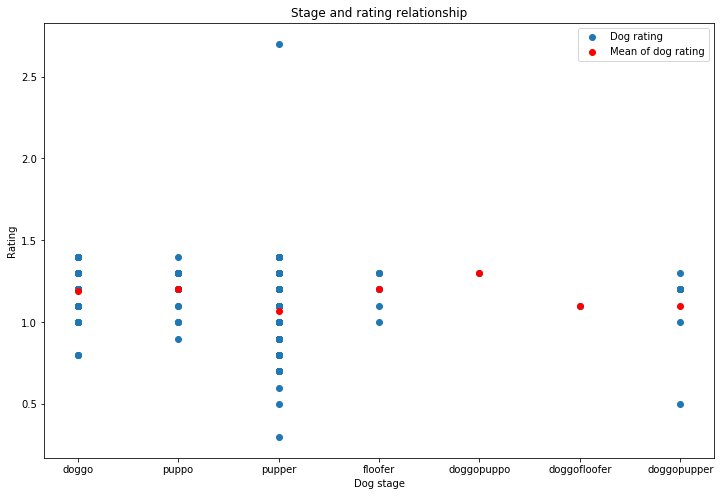

In [56]:
unique_stage = data.stage.unique()
plt.figure (figsize = (12,8))
plt.scatter (data['stage'][data['stage'].isnull()==False], data['rate'][data['stage'].isnull()==False], label = 'Dog rating')
for i in range (len(unique_stage)):
    if i == 0:
        plt.scatter(unique_stage[i],np.mean(data['rate'][data['stage']==unique_stage[i]]),label = 'Mean of dog rating', color = 'r')
    else:
        plt.scatter(unique_stage[i],np.mean(data['rate'][data['stage']==unique_stage[i]]), color = 'r')
plt.title('Stage and rating relationship')
plt.xlabel ('Dog stage')
plt.ylabel ('Rating')
plt.legend()
plt.show()

## Analysis question 2: Breed and rating relationship

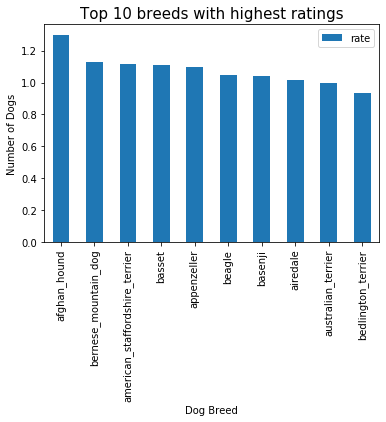

In [57]:
data.groupby('breed')[['rate']].mean()[0:10].sort_values(ascending=False, by ='rate').plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 breeds with highest ratings', size=15)
plt.xlabel('Dog Breed')
plt.show()

## Analysis question 3: What are the most popular dog names

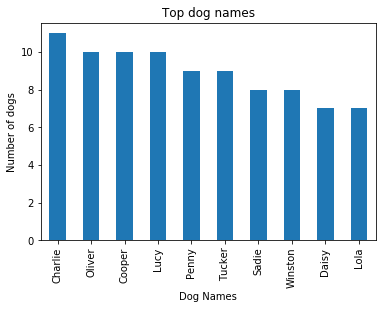

In [58]:
data['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of dogs')
plt.title('Top dog names')
plt.xlabel('Dog Names')
plt.plot();

## Analysis question 4: What dog stages have the highest favorite count

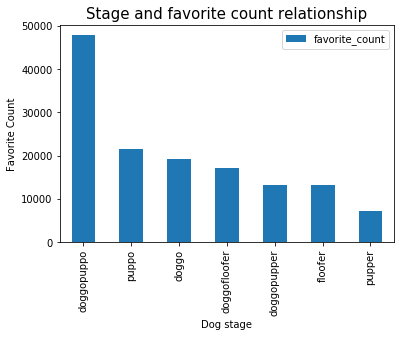

In [59]:
data.groupby('stage')[['favorite_count']].mean().sort_values(ascending=False, by ='favorite_count').plot(kind = 'bar')
plt.ylabel('Favorite Count')
plt.title('Stage and favorite count relationship', size=15)
plt.xlabel('Dog stage')
plt.show()

## Summary
1. I define the question to analyse before performing the data cleaning process. Thus, I save time by not cleaning the unnecessary columns that I will delete anyway (e.g: source). 
2. The rating and dog breeds require some of my intuition in defining the final value of the dataset. This value is negotiable if the people in charge have a better ideas on how to define these columns. 
3. I decided to keep Nan rows at the final dataset, because if I remove all rows with Nan, I will have a small dataset that is not enough for further analysis. 
4. Doggopuppo receives a few ratings, but end up staying at the highest rate. Surprisingly, it also has the highest favorite count in the dataset. I thought the highest ratings appear due to the small sample size, but the favorite count says that it is not coincidence. 